# Introduction

**Prerequisites**

- Python Fundamentals


**Outcomes**

- Understand the core pandas objects  
- Series  
- DataFrame  
- Index into particular elements of a Series and DataFrame  
- Understand what `.dtype`/`.dtypes` do  
- Make basic visualizations  


**Data**

- US regional unemployment data from Bureau of Labor Statistics  

## Pandas

This notebook begins the material on `pandas`

To start we will import the pandas package and give it the nickname
`"pd"`, which is the conventional way to import pandas

In [1]:
import pandas as pd

# Don't worry about this line for now!
%matplotlib inline

Sometimes it will be helpful to know which version of pandas we are
using

We can check this by running the code below

## Series

The first main pandas type we will introduce is called Series

A Series is a single column of data, with row labels for each
observation

Pandas refers to the row labels as the *index* of the Series

<img src="https://storage.googleapis.com/ds4e/_static/intro_files/PandasSeries.png" alt="PandasSeries.png" style="">

  
Below we create a Series which contains the US unemployment rate every
other year starting in 1995

In [2]:
values = [5.6, 5.3, 4.3, 4.2, 5.8, 5.3, 4.6, 7.8, 9.1, 8., 5.7]
years = list(range(1995, 2017, 2))

unemp = pd.Series(data=values, index=years, name="Unemployment")

In [4]:
unemp

1995    5.6
1997    5.3
1999    4.3
2001    4.2
2003    5.8
2005    5.3
2007    4.6
2009    7.8
2011    9.1
2013    8.0
2015    5.7
Name: Unemployment, dtype: float64

We can look at the index and values in our Series

In [5]:
unemp.index

Int64Index([1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015], dtype='int64')

In [6]:
unemp.values

array([5.6, 5.3, 4.3, 4.2, 5.8, 5.3, 4.6, 7.8, 9.1, 8. , 5.7])

In [ ]:
unemp.

### What can we do with a Series object?

#### `.head` and `.tail`

Often our data will have many rows and we won’t want to display it all
at once

The methods `.head` and `.tail` show rows at the beginning and end
of our Series, respectively

In [7]:
unemp.head()

1995    5.6
1997    5.3
1999    4.3
2001    4.2
2003    5.8
Name: Unemployment, dtype: float64

In [12]:
unemp.tail()

2007    4.6
2009    7.8
2011    9.1
2013    8.0
2015    5.7
Name: Unemployment, dtype: float64

#### Basic Plotting

We can also plot data using the `.plot` method

This is why we needed the `%matplotlib inline` — it tells the notebook
to display figures inside the notebook itself

*Note*: Pandas can do much more in terms of visualization

We will talk about more advanced visualization features later

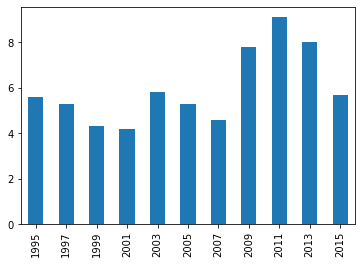

In [14]:
unemp.plot(kind="bar")

#### Unique values

In this dataset it doesn’t make much sense, but we may want to find the
unique values in a Series

This can be done with the `.unique` method

In [17]:
unemp.unique()

array([5.6, 5.3, 4.3, 4.2, 5.8, 4.6, 7.8, 9.1, 8. , 5.7])

#### Indexing

Sometimes we will want to select particular elements from a Series

We can do this using `.loc[index_things]`; where `index_things` is
an item from the index, or a list of items in the index

We will see this more in depth in a coming lecture, but for now we
demonstrate how to select one or multiple elements of the Series

In [19]:
unemp

1995    5.6
1997    5.3
1999    4.3
2001    4.2
2003    5.8
2005    5.3
2007    4.6
2009    7.8
2011    9.1
2013    8.0
2015    5.7
Name: Unemployment, dtype: float64

In [24]:
unemp.loc[[2009, 1995]]

2009    7.8
1995    5.6
Name: Unemployment, dtype: float64

In [25]:
unemp.iloc[-1]

5.7

In [12]:
unemp.loc[[1995, 2005, 2015]]

1995    5.6
2005    5.3
2015    5.7
Name: Unemployment, dtype: float64

<blockquote>

**Check for understanding**

For each of the following exercises, we recommend reading the documentation
for help

- Display only the first 2 elements of the Series using the `.head` method  
- Using the `plot` method, make a bar plot  
- Use `.loc` to select the lowest/highest unemployment rate shown in the Series  
- Run the code `unemp.dtype` below. What does it give you? Talk with your neighbor about where it might come from  



</blockquote>

In [27]:
unemp.loc[[unemp.idxmin(), unemp.idxmax()]]

2001    4.2
2011    9.1
Name: Unemployment, dtype: float64

## DataFrame

A DataFrame is how pandas stores one or more columns of data

We can think a DataFrames a multiple Series stacked side by side as
columns

This is similar to a sheet in an Excel workbook or a table in a SQL
database

In addition to row labels (an index), DataFrames also have column labels

We refer to these column labels as the columns or column names

<img src="https://storage.googleapis.com/ds4e/_static/intro_files/PandasDataFrame.png" alt="PandasDataFrame.png" style="">

  
Below we create a DataFrame that contains the unemployment rate every
other year by region of the US starting in 1995.

In [31]:
data = {"NorthEast": [5.9,  5.6,  4.4,  3.8,  5.8,  4.9,  4.3,  7.1,  8.3,  7.9,  5.7],
        "MidWest": [4.5,  4.3,  3.6,  4. ,  5.7,  5.7,  4.9,  8.1,  8.7,  7.4,  5.1],
        "South": [5.3,  5.2,  4.2,  4. ,  5.7,  5.2,  4.3,  7.6,  9.1,  7.4,  5.5],
        "West": [6.6, 6., 5.2, 4.6, 6.5, 5.5, 4.5, 8.6, 10.7, 8.5, 6.1],
        "National": [5.6, 5.3, 4.3, 4.2, 5.8, 5.3, 4.6, 7.8, 9.1, 8., 5.7]}

unemp_region = pd.DataFrame(data, index=years)
unemp_region

,NorthEast,MidWest,South,West,National
1995,5.9,4.5,5.3,6.6,5.6
1997,5.6,4.3,5.2,6.0,5.3
1999,4.4,3.6,4.2,5.2,4.3
2001,3.8,4.0,4.0,4.6,4.2
2003,5.8,5.7,5.7,6.5,5.8
2005,4.9,5.7,5.2,5.5,5.3
2007,4.3,4.9,4.3,4.5,4.6
2009,7.1,8.1,7.6,8.6,7.8
2011,8.3,8.7,9.1,10.7,9.1
2013,7.9,7.4,7.4,8.5,8.0


We can retrieve the index and the DataFrame values in the same way we
did with a Series

In [33]:
unemp_region.index

Int64Index([1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015], dtype='int64')

In [34]:
unemp_region.values

array([[ 5.9,  4.5,  5.3,  6.6,  5.6],
       [ 5.6,  4.3,  5.2,  6. ,  5.3],
       [ 4.4,  3.6,  4.2,  5.2,  4.3],
       [ 3.8,  4. ,  4. ,  4.6,  4.2],
       [ 5.8,  5.7,  5.7,  6.5,  5.8],
       [ 4.9,  5.7,  5.2,  5.5,  5.3],
       [ 4.3,  4.9,  4.3,  4.5,  4.6],
       [ 7.1,  8.1,  7.6,  8.6,  7.8],
       [ 8.3,  8.7,  9.1, 10.7,  9.1],
       [ 7.9,  7.4,  7.4,  8.5,  8. ],
       [ 5.7,  5.1,  5.5,  6.1,  5.7]])

### What can we do with a DataFrame?

Pretty much everything we can do with a Series

#### `.head` and `.tail`

As with Series, we can use `.head` and `.tail` to show only the
first or last `n` rows

In [35]:
unemp_region.head()

,NorthEast,MidWest,South,West,National
1995,5.9,4.5,5.3,6.6,5.6
1997,5.6,4.3,5.2,6.0,5.3
1999,4.4,3.6,4.2,5.2,4.3
2001,3.8,4.0,4.0,4.6,4.2
2003,5.8,5.7,5.7,6.5,5.8


In [36]:
unemp_region.tail(3)

,NorthEast,MidWest,South,West,National
2011,8.3,8.7,9.1,10.7,9.1
2013,7.9,7.4,7.4,8.5,8.0
2015,5.7,5.1,5.5,6.1,5.7


#### Plotting

We can generate plots with the `.plot` method

Notice we now have a separate line for each column of data

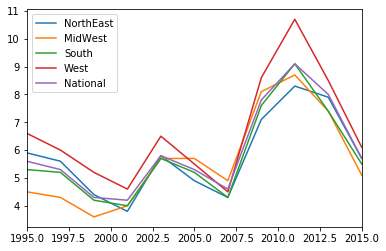

In [37]:
unemp_region.plot()

#### Indexing

We can also do indexing using `.loc`

However, there is a little more to it than before because we can choose
subsets of both row and columns

In [39]:
unemp_region.head()

,NorthEast,MidWest,South,West,National
1995,5.9,4.5,5.3,6.6,5.6
1997,5.6,4.3,5.2,6.0,5.3
1999,4.4,3.6,4.2,5.2,4.3
2001,3.8,4.0,4.0,4.6,4.2
2003,5.8,5.7,5.7,6.5,5.8


In [38]:
unemp_region.loc[1995, "NorthEast"]

5.9

In [20]:
unemp_region.loc[[1995, 2005], "South"]

1995    5.3
2005    5.2
Name: South, dtype: float64

In [40]:
unemp_region.loc[1995, ["NorthEast", "National"]]

NorthEast    5.9
National     5.6
Name: 1995, dtype: float64

In [41]:
unemp_region.loc[:, "NorthEast"]

1995    5.9
1997    5.6
1999    4.4
2001    3.8
2003    5.8
2005    4.9
2007    4.3
2009    7.1
2011    8.3
2013    7.9
2015    5.7
Name: NorthEast, dtype: float64

In [23]:
# `[string]` with no `.loc` extracts a whole column
unemp_region["MidWest"]

1995    4.5
1997    4.3
1999    3.6
2001    4.0
2003    5.7
2005    5.7
2007    4.9
2009    8.1
2011    8.7
2013    7.4
2015    5.1
Name: MidWest, dtype: float64

### Computations with columns

Pandas can do various computations and mathematical operations on
columns

Let’s take a look at a few of them

In [42]:
# Divide by 100 to move from percent units to a rate
unemp_region["West"] / 100

1995    0.066
1997    0.060
1999    0.052
2001    0.046
2003    0.065
2005    0.055
2007    0.045
2009    0.086
2011    0.107
2013    0.085
2015    0.061
Name: West, dtype: float64

In [43]:
# Find maximum
unemp_region["West"].max()

10.7

In [50]:
unemp_region["West"].iloc[1:5]

1997    6.0
1999    5.2
2001    4.6
2003    6.5
Name: West, dtype: float64

In [51]:
unemp_region["MidWest"].head(6)

1995    4.5
1997    4.3
1999    3.6
2001    4.0
2003    5.7
2005    5.7
Name: MidWest, dtype: float64

In [49]:
# Find the difference between two columns
# Notice that pandas applies `-` to _all rows_ at one time
# We'll see more of this throughout these materials
unemp_region["West"].iloc[1:5] - unemp_region["MidWest"].head(6)

1995    NaN
1997    1.7
1999    1.6
2001    0.6
2003    0.8
2005    NaN
dtype: float64

In [45]:
# Find correlation between two columns
unemp_region.West.corr(unemp_region["MidWest"])

0.9006381255384481

In [46]:
# find correlation between all column pairs
unemp_region.corr()

,NorthEast,MidWest,South,West,National
NorthEast,1.000000,0.875654,0.964415,0.967875,0.976016
MidWest,0.875654,1.000000,0.951379,0.900638,0.952389
South,0.964415,0.951379,1.000000,0.987259,0.995030
West,0.967875,0.900638,0.987259,1.000000,0.981308
National,0.976016,0.952389,0.995030,0.981308,1.000000


<blockquote>

**Check for understanding**

For each of the following, we recommend reading the documentation for help

- Use introspection (or google-fu) to find a way to obtain a list with
  all of the column names in `unemp_region`  
- Using the `plot` method, make a bar plot. What does it look like
  now?  
- Use `.loc` to select the the unemployment data for the
  `NorthEast` and `West` for the years 1995, 2005, 2011, and 2015.  
- Run the code `unemp_region.dtypes` below. What does it give you?
  How does this compare with `unemp.dtype`?  



</blockquote>

## Data types

We asked you to run the commands `unemp.dtype` and
`unemp_region.dtypes` and think about what these methods output

You might have guessed that they return the type of the values inside
each column

Occasionally, you might need to investigate what types you have in your
DataFrame when an operation is not doing what you expect it to

In [52]:
unemp.dtype

dtype('float64')

In [53]:
unemp_region.dtypes

NorthEast    float64
MidWest      float64
South        float64
West         float64
National     float64
dtype: object

DataFrames will only distinguish between a few types

- Booleans (`bool`)  
- Floating point numbers (`float64`)  
- Integers (`int64`)  
- Dates (`datetime`) — we will learn this soon  
- Categorical data (`categorical`)  
- Everything else, including strings (`object`)  


In the future, we will often refer to the type of data stored in a
column as its `dtype`

Let’s look at an example for when having an incorrect `dtype` can
cause problems

Suppose that when we imported the data the `South` column was
interpreted as a string

In [31]:
str_unemp = unemp_region.copy()
str_unemp["South"] = str_unemp["South"].astype(str)
str_unemp.dtypes

NorthEast    float64
MidWest      float64
South         object
West         float64
National     float64
dtype: object

Everything *looks* ok…

In [32]:
str_unemp.head()

,NorthEast,MidWest,South,West,National
1995,5.9,4.5,5.3,6.6,5.6
1997,5.6,4.3,5.2,6.0,5.3
1999,4.4,3.6,4.2,5.2,4.3
2001,3.8,4.0,4.0,4.6,4.2
2003,5.8,5.7,5.7,6.5,5.8


But if we try to do something like compute the sum of all the columns,
we get unexpected results…

In [33]:
str_unemp.sum()

NorthEast                                 63.7
MidWest                                     62
South        5.35.24.24.05.75.24.37.69.17.45.5
West                                      72.8
National                                  65.7
dtype: object

This happened because `.sum` effectively calls `+` on all rows in
each column

Recall that when we apply `+` to two strings, the result is the
strings mashed together

So in this case we saw that the entries in all the rows of the South
column were stitched together into one long string

## Changing DataFrames

We can change the data inside of a DataFrame in various ways:

- Adding new columns  
- Changing index labels or column names  
- Altering existing data (e.g. doing some arithmetic or making a column
  of strings lowercase)  


Some of these “mutations” will be topics of future notebooks, so we will
only briefly discuss a few of the things we can do below

### Creating new columns

We can create new data by “assigning values to a column” similar to how
we assign values to a variable

In pandas, we create a new column of a DataFrame by writing

```python
df["New Column Name"] = new_values
```


Below we create an unweighted mean of the unemployment rate across the
four regions of the US — notice this differs from the national
unemployment rate

In [34]:
unemp_region["UnweightedMean"] = (unemp_region["NorthEast"] +
                                  unemp_region["MidWest"] +
                                  unemp_region["South"] +
                                  unemp_region["West"])/4

In [35]:
unemp_region.head()

,NorthEast,MidWest,South,West,National,UnweightedMean
1995,5.9,4.5,5.3,6.6,5.6,5.575
1997,5.6,4.3,5.2,6.0,5.3,5.275
1999,4.4,3.6,4.2,5.2,4.3,4.350
2001,3.8,4.0,4.0,4.6,4.2,4.100
2003,5.8,5.7,5.7,6.5,5.8,5.925


### Changing values

Changing the values inside of a DataFrame should be done sparingly

However, it can be done by assigning a value to a location in the
DataFrame

`df.loc[index, column] = value`

In [36]:
unemp_region.loc[1995, "UnweightedMean"] = 0.0

In [37]:
unemp_region.head()

,NorthEast,MidWest,South,West,National,UnweightedMean
1995,5.9,4.5,5.3,6.6,5.6,0.000
1997,5.6,4.3,5.2,6.0,5.3,5.275
1999,4.4,3.6,4.2,5.2,4.3,4.350
2001,3.8,4.0,4.0,4.6,4.2,4.100
2003,5.8,5.7,5.7,6.5,5.8,5.925


### Renaming columns

We can also rename the columns of a DataFrame

This is helpful because the names that sometimes come with datasets are
unbearable…

For example, the original name for the North East unemployment rate
given by the Bureau of Labor Statistics was `LASRD910000000000003`…

They have their reasons for using these names, but it can make our job
difficult since we need to type it sometimes repeatedly

We can rename columns by passing a dictionary to the `rename` method

This dictionary contains the old names as the keys and new names as the
values.

See the example below

In [38]:
names = {"NorthEast": "NE",
         "MidWest": "MW",
         "South": "S",
         "West": "W"}
unemp_region.rename(columns=names)

,NE,MW,S,W,National,UnweightedMean
1995,5.9,4.5,5.3,6.6,5.6,0.000
1997,5.6,4.3,5.2,6.0,5.3,5.275
1999,4.4,3.6,4.2,5.2,4.3,4.350
2001,3.8,4.0,4.0,4.6,4.2,4.100
2003,5.8,5.7,5.7,6.5,5.8,5.925
2005,4.9,5.7,5.2,5.5,5.3,5.325
2007,4.3,4.9,4.3,4.5,4.6,4.500
2009,7.1,8.1,7.6,8.6,7.8,7.850
2011,8.3,8.7,9.1,10.7,9.1,9.200
2013,7.9,7.4,7.4,8.5,8.0,7.800


In [39]:
unemp_region.head()

,NorthEast,MidWest,South,West,National,UnweightedMean
1995,5.9,4.5,5.3,6.6,5.6,0.000
1997,5.6,4.3,5.2,6.0,5.3,5.275
1999,4.4,3.6,4.2,5.2,4.3,4.350
2001,3.8,4.0,4.0,4.6,4.2,4.100
2003,5.8,5.7,5.7,6.5,5.8,5.925


We renamed our columns… Why does the DataFrame still show the old
column names?

Many of the operations that pandas does creates a copy of your data by
default

It does this in order to protect your data and make sure you don’t
overwrite information you’d like to keep

We can make these operations permanent by either

1. Assigning the output back to the variable name
  `df = df.rename(columns=rename_dict)` or  
1. Looking into whether the method has an `inplace` option. For
  example, `df.rename(columns=rename_dict, inplace=True)`  


There are times when setting `inplace=True` will make your code faster
(e.g. if you have a very large DataFrame and you don’t want to copy all
the data), but that doesn’t always happen

We recommend using the first option until you get comfortable with
pandas because operations that don’t alter your data are (usually)
easier to reason about

In [40]:
names = {"NorthEast": "NE",
         "MidWest": "MW",
         "South": "S",
         "West": "W"}

unemp_shortname = unemp_region.rename(columns=names)
unemp_shortname.head()

,NE,MW,S,W,National,UnweightedMean
1995,5.9,4.5,5.3,6.6,5.6,0.000
1997,5.6,4.3,5.2,6.0,5.3,5.275
1999,4.4,3.6,4.2,5.2,4.3,4.350
2001,3.8,4.0,4.0,4.6,4.2,4.100
2003,5.8,5.7,5.7,6.5,5.8,5.925
